Usage notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

from scripts.vacem_ini import W_to_E0
from scripts.vacem_simulation import run_gridscan
from scripts.optuna_optimization import run_optuna_optimization
from scripts.utils import write_yaml

/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/pyfftw/interfaces/__init__.py:268: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  has_scipy_fft = _LooseVersion(scipy.__version__) >= _LooseVersion('1.4.0')
/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/optuna/storages/_rdb/models.py:40: MovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  BaseModel: Any = declarative_base()


### Gridscan simulation

In [2]:
# Laser pulse parameters
laser_params = []
for i in range(2):
    laser = {
        'tau': 25e-15,
        'lam': 800e-9,
        'w0': 2*800e-9,
        'W': 25,
        'theta': 180*i,
        'phi': 0,
        'beta': 0,
        'solution': 'gaussian_paraxial'
    }
    laser['E0'] = float(W_to_E0(laser))
    laser_params.append(laser)

laser_params = {f'laser_{i}': value for i,value in enumerate(laser_params)}

# Simulation box parameters
box_factors = {
    'long': 8,
    'trans': 20,
    't': 2
}

resolutions = {
    'spatial': 1,
    't': 1
}
simbox_params = {'box_factors': box_factors,
                 'resolutions': resolutions}

# Other parameters
mode = 'gridscan'
geometry = 'xz'
low_memory_mode = False
n_threads = 12
pol_idx = 0

data = {
    '_mode': mode,
    'lasers': laser_params,
    'simbox_params': simbox_params,
    'geometry': geometry,
    'low_memory_mode': low_memory_mode,
    'n_threads': n_threads,
    'pol_idx': pol_idx
}

# Variable parameters 
laser_key = 'laser_0'
param_key = 'tau'
grid = [20,40,3,1e-15]
vary_params = {
    'lasers': {laser_key: {param_key: grid}}
}

# Save yaml files
save_path = 'runs/test/gridscan/experiment/'
Path(os.path.dirname(save_path)).mkdir(parents=True, exist_ok=True)

default_yaml = f'{save_path}default_params.yml'
write_yaml(default_yaml, data)

vary_yaml = f'{save_path}vary_params.yml'
write_yaml(vary_yaml, vary_params)

In [3]:
run_gridscan(default_yaml, vary_yaml, save_path)

Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 225/225 [00:13<00:00, 16.18it/s]


Performance statistics

Maximum memory usage:            482.4MiB
Total wall time:               14.45s
Performed iterations:          225
Initialization wall time:      0.47s
Wall time per iteration:       0.06s
Successfully dumped to:        runs/test/gridscan/experiment/laser_0_tau/tau_20/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 270/270 [00:23<00:00, 11.47it/s]


Performance statistics

Maximum memory usage:            728.2MiB
Total wall time:               24.24s
Performed iterations:          270
Initialization wall time:      0.60s
Wall time per iteration:       0.09s
Successfully dumped to:        runs/test/gridscan/experiment/laser_0_tau/tau_30/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 360/360 [00:48<00:00,  7.49it/s]


Performance statistics

Maximum memory usage:            1.1GiB
Total wall time:               49.24s
Performed iterations:          360
Initialization wall time:      0.98s
Wall time per iteration:       0.13s
Successfully dumped to:        runs/test/gridscan/experiment/laser_0_tau/tau_40/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Grid simulation finished!


In [7]:
keys = ['N_total', 'Nperp_total', 'N_disc', 'Nperp_disc']
results = {key: [] for key in keys}
tau_grid = np.linspace(grid[0], grid[1], grid[2], endpoint=True, dtype=int)
for tau in tau_grid:
    path_loc = f'{save_path}{laser_key}_{param_key}/{param_key}_{tau}/postprocess_data.npz' 
    result_loc = np.load(path_loc)
    for key in keys:
        results[key].append(result_loc[key])

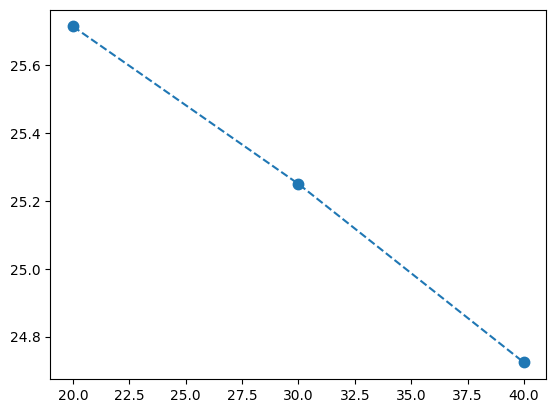

In [10]:
plt.figure()
plt.plot(tau_grid, results['N_total'], '.--', ms=15)
plt.show()

In [3]:
os.system(f'python scripts/cluster/gridscan_cluster.py --save_path={save_path}')

Traceback (most recent call last):
  File "/home/wi73yus/light-by-light/scripts/cluster/gridscan_cluster.py", line 19, in <module>
    from scripts.vacem_simulation import run_gridscan
ModuleNotFoundError: No module named 'scripts.vacem_simulation'


256

### Optuna optimization